Dataset cargado: 102 filas x 28 columnaas

🗑️ Eliminando columnas vacias

📝 Renombrando columnas...

🧹 Limpieza básica completada: 102 filas x 22 columnas

📋Columnas principales:
 ✔️ Site
 ✔️ Region
 ✔️ Subregion
 ✔️ Address
 ✔️ Latitude
 ✔️ Longitude
 ✔️ Altitude
 ✔️ Commissioned
 ✔️ Status

🔍 Revisando valores faltantes por columna:

🏔️ Estación más alta:
        Site  Altitude
34  Bathurst     625.0

🏞️ Estación más baja:
     Site  Altitude
22  Wyong       3.0


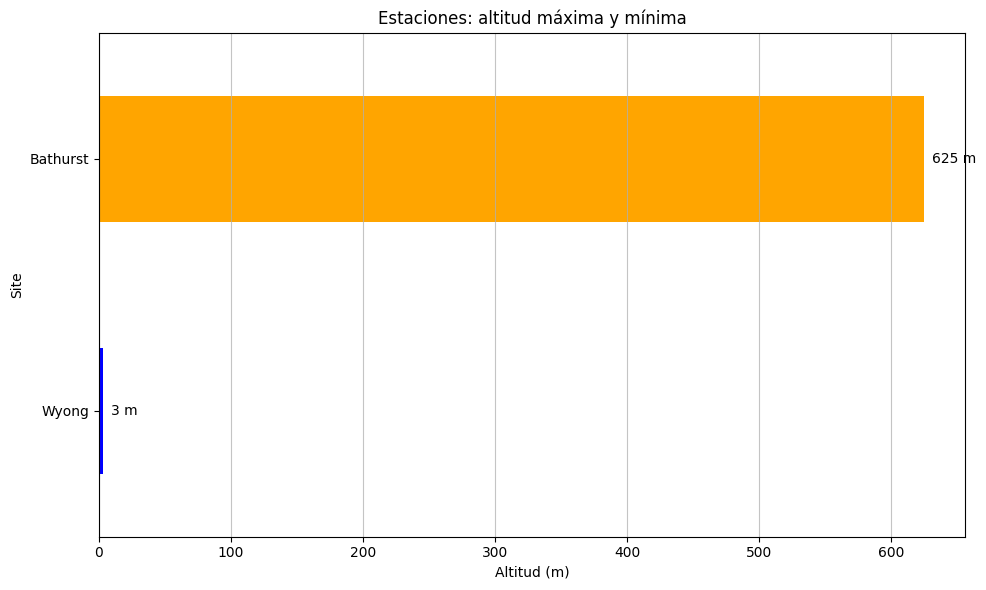

,num_monitorea,num_no_monitorea,media_monitorea,media_no_monitorea,diff_mean
contaminante,,,,,
PM10,61,29,117.321053,179.017857,-61.696805
PM2.5,43,47,118.324390,155.647727,-37.323337
TSP,33,57,186.357576,106.730769,79.626807
NO/NO2/NOx,36,54,57.750000,185.883019,-128.133019
SO2,26,64,52.250000,171.242623,-118.992623
O3,32,58,62.500000,174.557895,-112.057895
NEPH,30,60,61.703704,172.996552,-111.292848
CO,13,77,43.083333,153.189041,-110.105708
NH3,1,89,5.000000,139.223810,-134.223810


<Figure size 1000x600 with 0 Axes>

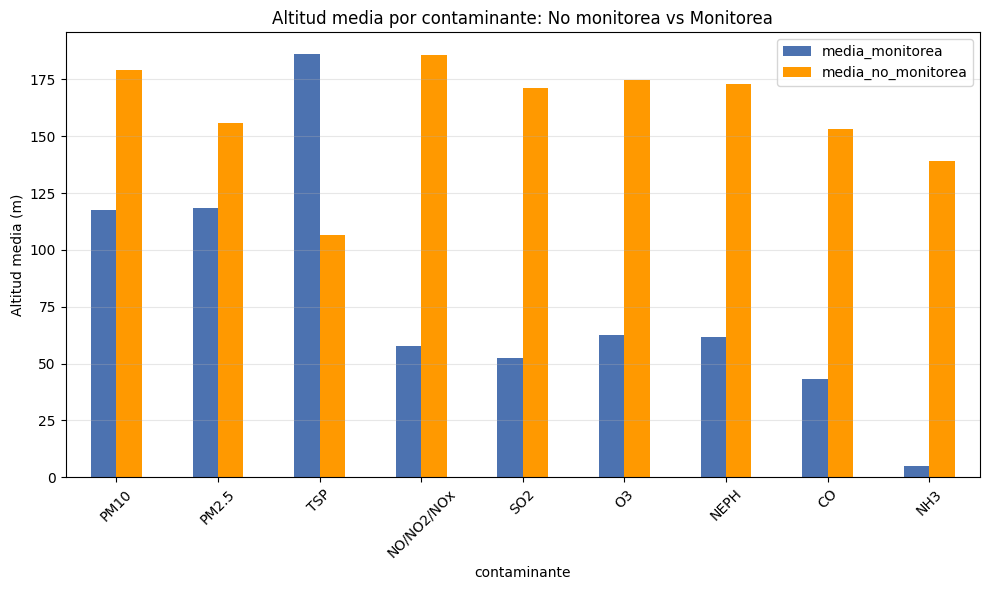

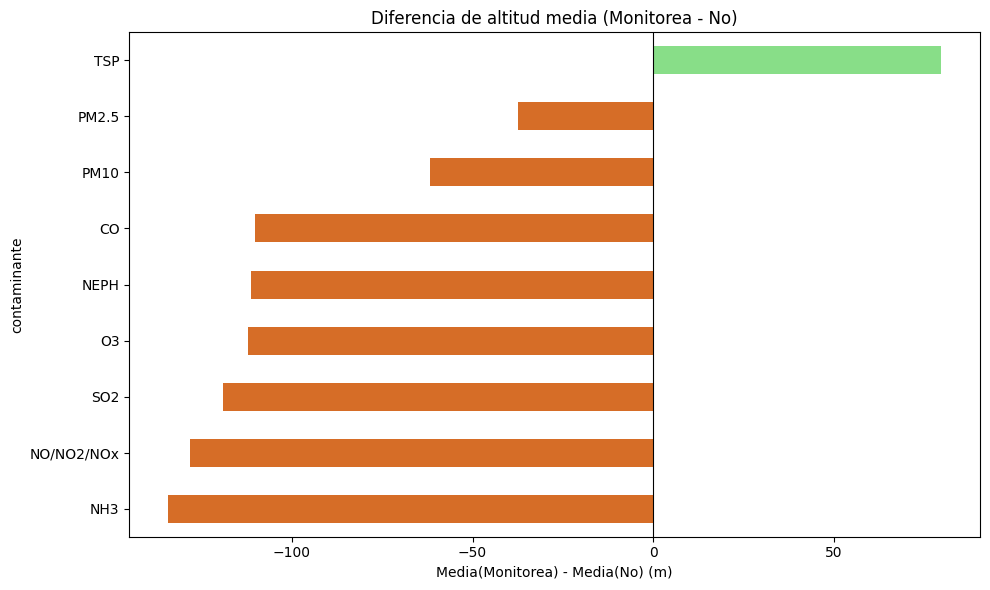


Guía rápida de interpretación:
- diff_media > 0: las estaciones que monitorean están a mayor altitud en promedio.
- diff_media < 0: las estaciones que monitorean están a menor altitud en promedio.

Conclusión: para casi todos los contaminantes las estaciones que monitorean (barra azul) están, en promedio, a menor altitud que las que NO monitorean (barra naranja).
Excepción notable: TSP muestra el caso inverso en tu gráfico (las que monitorean están a mayor altitud). Esto puede deberse a pocos registros o datos atípicos.
Interpretación plausible: la red de monitoreo está concentrada en áreas más bajas (ej. ciudades), por eso las estaciones con mediciones tienden a tener menor altitud. No implica causalidad contaminante↔altitud, solo asociación geográfica/bias de muestreo.


📊 Conteo de estaciones por región:


,Region,Estaciones
0,"Rural from ""Rural and regional NSW""",33
1,Sydney,24
2,Upper Hunter,14
3,Lower Hunter & Central Coast,7
4,Rural and regional NSW,7
5,Illawarra,5


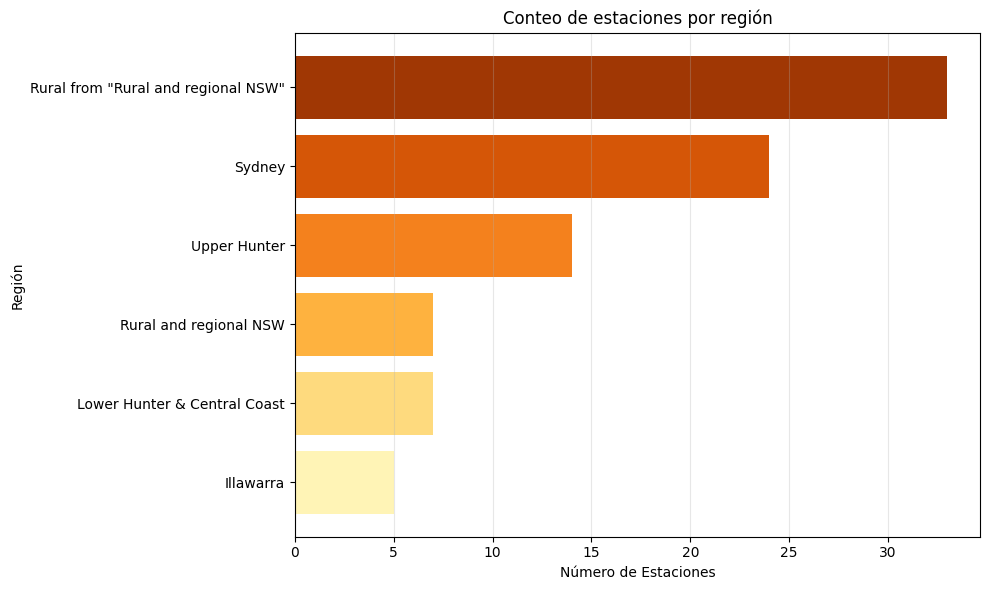

🌐 Convirtiendo coordenadas DMS a decimal...
✅ Conversión completada:
   Coordenadas válidas: 90/90 estaciones
   Porcentaje exitoso: 100.0%

📍 Rango de coordenadas (Australia):
   Latitud: -36.45 a -29.44
   Longitud: -151.78 a -139.74


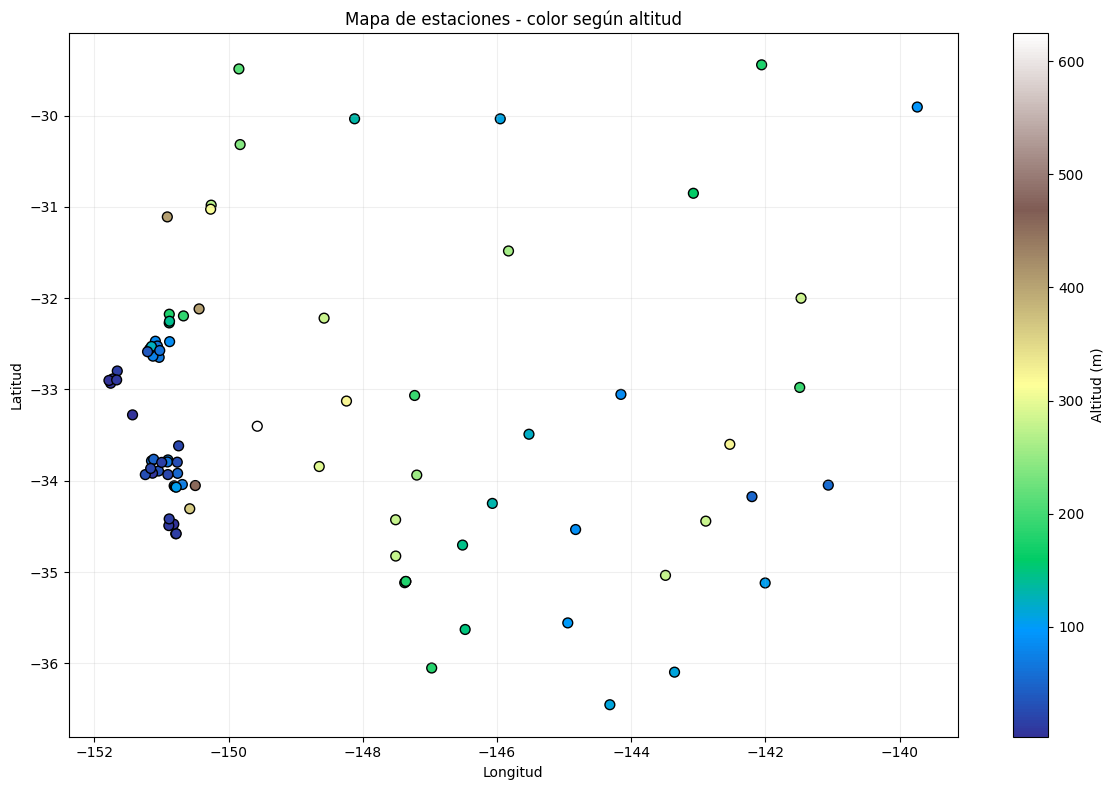

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


# configuracion basica para graficos más bonitos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

#leer archivo externo (importo el archivo)
df = pd.read_csv('air-quality-monitoring-sites-summary.csv')
print(f"Dataset cargado: {df.shape[0]} filas x {df.shape[1]} columnaas\n")

#muestra el encabezado más 3 registros (Exploro)
df.head(3)

#limpio los datos vacios o con errores
print("🗑️ Eliminando columnas vacias\n")
df = df.dropna(axis=1, how='all')  # Elimina columnas completamente vacías

####! LIMPIEZA DE DATOS
# eliminar columna de indice si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("🧹 Columna 'Unnamed: 0' eliminada\n")

#renombrar columnas con nombres más limpios
print("📝 Renombrando columnas...\n")
column_mapping = {
    'NSW air quality monitoring (AQMN) site': 'Site',
    'AQMN Region': 'Region',
    'Sub-region,where applicable': 'Subregion',
    'Site address': 'Address',
    'Latitude\n(South)': 'Latitude',
    'Longitude\n(East)': 'Longitude',
    'Altitude (ahd)': 'Altitude',
    'Commissioned': 'Commissioned',
    'Status': 'Status'
}
df = df.rename(columns=column_mapping)

# muestro resultados
print(f"🧹 Limpieza básica completada: {df.shape[0]} filas x {df.shape[1]} columnas")
print("\n📋Columnas principales:")
main_columns = ['Site','Region','Subregion','Address','Latitude','Longitude','Altitude','Commissioned','Status']
for col in main_columns:
    if col in df.columns:
        print(f" ✔️ {col}")

# eliminar columna de indice si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("   ✓ Columna 'Unnamed: 0' eliminada")


# revisar valores faltantes
print("\n🔍 Revisando valores faltantes por columna:")
df.isna().sum()

# eliminar filas sin datos clave como Latitud y Longitud
df = df.dropna(subset=['Latitude', 'Longitude'])


##? 🚀 **Ejercicios para Practicar**
#1. ¿Cuál es la estación más alta? ¿Y la más baja?
# Asegurar Altitude como numérico (evita errores si viene como texto)
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')

# Calcular estaciones con altitud máxima y mínima
estacion_max = df[df['Altitude'] == df['Altitude'].max()]
print(f"\n🏔️ Estación más alta:\n{estacion_max[['Site', 'Altitude']]}")
estacion_min = df[df['Altitude'] == df['Altitude'].min()]
print(f"\n🏞️ Estación más baja:\n{estacion_min[['Site', 'Altitude']]}")

# Construir DataFrame con los extremos (maneja igualdades y elimina duplicados)
df_ext = pd.concat([estacion_max[['Site','Altitude']], estacion_min[['Site','Altitude']]]).drop_duplicates().set_index('Site')

# Ordenar por Altitud descendente para que la más alta esté primero (aparezca arriba)
df_ext = df_ext.sort_values('Altitude', ascending=False)

# Colores: naranja para la máxima, azul para la mínima
max_alt = df_ext['Altitude'].max() if not df_ext.empty else 0
colors = ['orange' if alt == max_alt else 'blue' for alt in df_ext['Altitude']]

# Gráfico de barras horizontales
ax = df_ext['Altitude'].plot(kind='barh', color=colors, figsize=(10,6))
ax.set_xlabel('Altitud (m)')
ax.set_title('Estaciones: altitud máxima y mínima')

# Anotar valores al final de cada barra
for i, (site, alt) in enumerate(df_ext['Altitude'].items()):
    ax.text(alt + max_alt*0.01, i, f'{alt:.0f} m', va='center')

# Invertir eje y para que la estación con mayor altitud quede arriba
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()


#2. ¿Hay relación entre altitud y tipos de contaminantes monitoreados?
#* Lista de columnas que queremos analizar
cols = ['PM10','PM2.5','TSP','NO/NO2/NOx','SO2','O3','NEPH','CO','NH3']
contaminantes = [c for c in cols if c in df.columns]

rows = []
for c in contaminantes:
    monitorea = df[c].notna()
    num_monitorea = int(monitorea.sum())
    num_no_monitorea = int(len(monitorea) - num_monitorea)
    media_monitorea = df.loc[monitorea, 'Altitude'].mean()
    media_no_monitorea = df.loc[~monitorea, 'Altitude'].mean()
    rows.append({
        'contaminante': c, 
        'num_monitorea': num_monitorea, 
        'num_no_monitorea': num_no_monitorea,
        'media_monitorea': media_monitorea,
        'media_no_monitorea': media_no_monitorea,
        'diff_mean': media_monitorea - media_no_monitorea
        })

resumen = pd.DataFrame(rows).set_index('contaminante')
display(resumen)


# Gráfico 1: altitud media (No monitorea vs Monitorea)
plt.figure(figsize=(10,6))
resumen[['media_monitorea','media_no_monitorea']].plot(kind='bar', color=['#4c72b0','#ff9900'])
plt.ylabel('Altitud media (m)')
plt.title('Altitud media por contaminante: No monitorea vs Monitorea')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: diferencia de medias (Monitorea - No)
plt.figure(figsize=(10,6))
diffs = resumen['diff_mean'].sort_values()
colores = ["#d66d27" if v < 0 else "#88de88" for v in diffs.fillna(0)]
diffs.plot(kind='barh', color=colores)
plt.axvline(0, color='k', linewidth=0.8)
plt.xlabel('Media(Monitorea) - Media(No) (m)')
plt.title('Diferencia de altitud media (Monitorea - No)')
plt.tight_layout()
plt.show()

print("\nGuía rápida de interpretación:")
print("- diff_media > 0: las estaciones que monitorean están a mayor altitud en promedio.")
print("- diff_media < 0: las estaciones que monitorean están a menor altitud en promedio.")
print("""
Conclusión: para casi todos los contaminantes las estaciones que monitorean (barra azul) están, en promedio, a menor altitud que las que NO monitorean (barra naranja).
Excepción: TSP muestra el caso inverso. Esto puede deberse a pocos registros o datos atípicos.
Interpretación plausible: la red de monitoreo está concentrada en áreas más bajas (ej. ciudades), por eso las estaciones con mediciones tienden a tener menor altitud. No implica causalidad contaminante↔altitud.
""")


#3. Crea un gráfico que muestre estaciones por región
if 'Region' not in df.columns:
    print("❌ No hay columna 'Region' en el dataset")
else:
    #* agrupar por region y contar
    conteo_por_region = df['Region'].fillna('Sin región').value_counts()
    #* mostar tabla ordenada (Dataframe)
    conteo_def = conteo_por_region.rename_axis('Region').reset_index(name='Estaciones').sort_values('Estaciones', ascending=False)
    print("\n📊 Conteo de estaciones por región:")
    display(conteo_def)

#* graficar conteo por región (ordenado para que el mayor conteo quede arriba)
conteo_def_plot = conteo_def.sort_values('Estaciones', ascending=True)
palette = sns.color_palette('YlOrBr', n_colors=len(conteo_def_plot))
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(conteo_def_plot['Region'], conteo_def_plot['Estaciones'], color=palette)
ax.set_xlabel('Número de Estaciones')
ax.set_ylabel('Región')
ax.set_title('Conteo de estaciones por región')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



#4. ¿Podrías colorear el mapa por altitud?
def convert_dms_to_decimal(dms_string):
    """
    Convierte coordenadas DMS (ej: "32°38'56\"") a decimal (ej: -32.649)
    """
    if pd.isna(dms_string) or dms_string == '':
        return None
    
    try:
        #* Buscar números en el texto
        numbers = re.findall(r'\d+(?:\.\d+)?', str(dms_string))
        
        if len(numbers) >= 2:
            degrees = float(numbers[0])
            minutes = float(numbers[1])
            seconds = float(numbers[2]) if len(numbers) > 2 else 0
            
            # Convertir a decimal
            decimal = degrees + minutes/60 + seconds/3600
            
            # En Australia, latitudes son negativas (sur)
            if 'South' in str(dms_string) or decimal > 0:
                decimal = -abs(decimal)
                
            return decimal
    except:
        pass
    
    return None

print("🌐 Convirtiendo coordenadas DMS a decimal...")

#* Convertir coordenadas
df['Latitude'] = df['Latitude'].apply(convert_dms_to_decimal)
df['Longitude'] = df['Longitude'].apply(convert_dms_to_decimal)

#* Verificar resultado
valid_coords = df[['Latitude', 'Longitude']].notna().all(axis=1).sum()
print(f"✅ Conversión completada:")
print(f"   Coordenadas válidas: {valid_coords}/{len(df)} estaciones")
print(f"   Porcentaje exitoso: {(valid_coords/len(df)*100):.1f}%")

if valid_coords > 0:
    print(f"\n📍 Rango de coordenadas (Australia):")
    print(f"   Latitud: {df['Latitude'].min():.2f} a {df['Latitude'].max():.2f}")
    print(f"   Longitud: {df['Longitude'].min():.2f} a {df['Longitude'].max():.2f}")
    

#* Grafica el mapa con coordenadas decimales
plt.figure(figsize=(12,8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['Altitude'], cmap='terrain', s=50, edgecolor='k')
plt.colorbar(scatter, label='Altitud (m)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de estaciones - color según altitud')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

#------------------------------------------------------------------------#